In [1]:
# X(x1, x2)  y(0/1/2/3/4)
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)
Num = int(1000)

In [3]:
x_1 = np.random.normal(-3, 1, size = (Num))
x_2 = np.random.normal(-3, 1, size = (Num))
y = np.zeros(Num)
c_0 = np.array([x_1, x_2, y]).T

In [4]:
x_1 = np.random.normal(3, 1, size = (Num))
x_2 = np.random.normal(-3, 1, size = (Num))
y = np.ones(Num)
c_1 = np.array([x_1, x_2, y]).T

In [5]:
x_1 = np.random.normal(-3, 1, size = (Num))
x_2 = np.random.normal(3, 1, size = (Num))
y = np.ones(Num) * 2
c_2 = np.array([x_1, x_2, y]).T

In [6]:
x_1 = np.random.normal(3, 1, size = (Num))
x_2 = np.random.normal(3, 1, size = (Num))
y = np.ones(Num) * 3
c_3 = np.array([x_1, x_2, y]).T

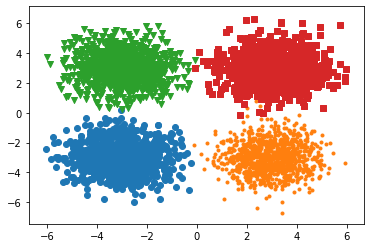

In [7]:
plt.scatter(c_0[:, 0], c_0[:, 1], marker='o')
plt.scatter(c_1[:, 0], c_1[:, 1], marker='.')
plt.scatter(c_2[:, 0], c_2[:, 1], marker='v')
plt.scatter(c_3[:, 0], c_3[:, 1], marker='s')

In [8]:
All_data = np.concatenate( (c_0, c_1, c_2, c_3) )
All_data.shape

(4000, 3)

In [9]:
np.random.shuffle(All_data)

In [10]:
train_data_X = All_data[:3000, :2]
train_data_y = All_data[:3000, -1].reshape(3000, 1)
test_data_X = All_data[3000:, :2]
test_data_y = All_data[3000:, -1].reshape(1000, 1)
train_data_X.shape, train_data_y.shape, test_data_X.shape, test_data_y.shape

((3000, 2), (3000, 1), (1000, 2), (1000, 1))

In [11]:
# y = w1*x1 + w2*x2 + b
W = np.random.rand(4, 2)
W.shape

(4, 2)

In [12]:
bias = np.random.rand(1, 4)
bias.shape

(1, 4)

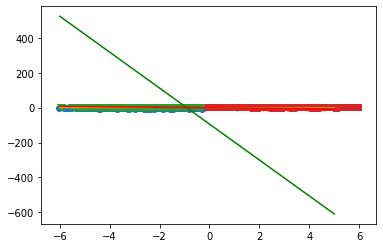

In [13]:
plt.scatter(c_0[:, 0], c_0[:, 1], marker='o')
plt.scatter(c_1[:, 0], c_1[:, 1], marker='.')
plt.scatter(c_2[:, 0], c_2[:, 1], marker='v')
plt.scatter(c_3[:, 0], c_3[:, 1], marker='s')
x = np.arange(-6, 6)
y1 = -(W[0, 0] * x + bias[0, 0]) / W[0, 1]
plt.plot(x, y1, 'b')
y2 = -(W[1, 0] * x + bias[0, 1]) / W[1, 1]
plt.plot(x, y2, 'y')
y3 = -(W[2, 0] * x + bias[0, 2]) / W[2, 1]
plt.plot(x, y3, 'g')
y4 = -(W[3, 0] * x + bias[0, 3]) / W[3, 1]
plt.plot(x, y4, 'r')

$ softmax(x) = e^x / \sum{e^x}$

In [14]:
def softmax(z):
    if z.ndim == 1:
        return np.exp(z) / np.sum(np.exp(z))
    elif z.ndim == 2:
        exp = np.exp(z)
        sum_exp = np.sum(np.exp(z), axis = 1, keepdims = True)
        return exp / sum_exp

In [15]:
# one_hot
def one_hot(temp):
    one_hot = np.zeros( (len(temp), len(np.unique(temp))) )
    one_hot[np.arange(len(temp)), temp.astype(np.int).T] = 1
    return one_hot

In [16]:
# 计算y_hat
def compute_y_hat(W, X, b):
    return np.dot(X, W.T) + bias

In [17]:
# 交叉熵损失函数
def cross_entropy(y, y_hat):
    loss = -(1 / len(y)) * np.sum(y * np.log(y_hat))
    return loss

In [18]:
train_data_X.shape, W.shape

((3000, 2), (4, 2))

In [18]:
# w = w - lr * grad
lr = 0.001
loss_list = []
for i in range(int(1e4)):
    # 计算loss
    X = train_data_X
    y_hat = softmax(compute_y_hat(W, X, bias))
    y = one_hot(train_data_y)
    loss = cross_entropy(y, y_hat)
    loss_list.append(loss)
    grad_w = np.dot(X.T, (y_hat - y)) * (1 / len(X))
    grad_b = np.sum(y_hat - y) * (1 / len(X))
    W = W - lr * grad_w.T
    bias = bias - lr * grad_b
    if i % 300 == 0:
        print("i = %d, loss = %f"%(i, loss))

i = 0, loss = 2.499365
i = 300, loss = 0.964056
i = 600, loss = 0.515818
i = 900, loss = 0.355244
i = 1200, loss = 0.275939
i = 1500, loss = 0.228525
i = 1800, loss = 0.196752
i = 2100, loss = 0.173832
i = 2400, loss = 0.156431
i = 2700, loss = 0.142718
i = 3000, loss = 0.131601
i = 3300, loss = 0.122384
i = 3600, loss = 0.114603
i = 3900, loss = 0.107936
i = 4200, loss = 0.102152
i = 4500, loss = 0.097081
i = 4800, loss = 0.092593
i = 5100, loss = 0.088591
i = 5400, loss = 0.084997
i = 5700, loss = 0.081748
i = 6000, loss = 0.078796
i = 6300, loss = 0.076100
i = 6600, loss = 0.073627
i = 6900, loss = 0.071350
i = 7200, loss = 0.069245
i = 7500, loss = 0.067292
i = 7800, loss = 0.065475
i = 8100, loss = 0.063779
i = 8400, loss = 0.062193
i = 8700, loss = 0.060706
i = 9000, loss = 0.059308
i = 9300, loss = 0.057991
i = 9600, loss = 0.056748
i = 9900, loss = 0.055572


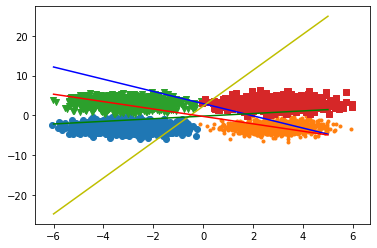

In [19]:
plt.scatter(c_0[:, 0], c_0[:, 1], marker='o')
plt.scatter(c_1[:, 0], c_1[:, 1], marker='.')
plt.scatter(c_2[:, 0], c_2[:, 1], marker='v')
plt.scatter(c_3[:, 0], c_3[:, 1], marker='s')
x = np.arange(-6, 6)
y1 = -(W[0, 0] * x + bias[0, 0]) / W[0, 1]
plt.plot(x, y1, 'b')
y2 = -(W[1, 0] * x + bias[0, 1]) / W[1, 1]
plt.plot(x, y2, 'y')
y3 = -(W[2, 0] * x + bias[0, 2]) / W[2, 1]
plt.plot(x, y3, 'g')
y4 = -(W[3, 0] * x + bias[0, 3]) / W[3, 1]
plt.plot(x, y4, 'r')

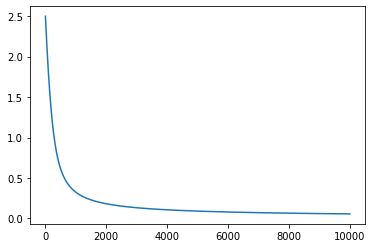

In [38]:
plt.plot(loss_list)

In [20]:
# 测试集预测
test_data_y.shape

(1000, 1)

In [27]:
def predict(x):
    y_hat = softmax(compute_y_hat(W, x, bias))
    return np.argmax(y_hat, axis = 1)[:, np.newaxis]

In [28]:
predict(test_data_X).shape, test_data_y.shape

((1000, 1), (1000, 1))

In [37]:
print("Correct Rate = {}%".format(np.sum(predict(test_data_X) == test_data_y) / len(test_data_y) * 100))

Correct Rate = 99.6%
